<a href="https://colab.research.google.com/github/ccjimenezm/Network_science_G9/blob/main/Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Github/Network_science_G9/

/content/drive/MyDrive/Github/Network_science_G9


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from networkx.algorithms import bipartite

In [4]:
dataset = open("brunson_club-membership/out.brunson_club-membership_club-membership", "r")

In [5]:
list_obj = [item.split(' ') for item in dataset.readlines()]

In [6]:
type(int(list_obj[2][0]))

int

In [7]:
users = []
clubs = []
edges = []
for x in list_obj:
  if x[0] != '%':
    edges.append((x[0]+'u',x[1]+'c'))
    users.append(int(x[0]))
    clubs.append(int(x[1]))

In [8]:
res = np.array(users) 
users_uni = np.unique(res) 

In [9]:
users_uni = np.sort(users_uni).tolist()

In [10]:
users_uni = [str(i) + 'u' for i in users_uni]

In [11]:
users_uni

['1u',
 '2u',
 '3u',
 '4u',
 '5u',
 '6u',
 '7u',
 '8u',
 '9u',
 '10u',
 '11u',
 '12u',
 '13u',
 '14u',
 '15u',
 '16u',
 '17u',
 '18u',
 '19u',
 '20u',
 '21u',
 '22u',
 '23u',
 '24u',
 '25u']

In [12]:
res = np.array(clubs) 
clubs_uni = np.unique(res) 
clubs_uni = np.sort(clubs_uni).tolist()

In [13]:
clubs_uni = [str(i) + 'c' for i in clubs_uni]

In [14]:
clubs_uni

['1c',
 '2c',
 '3c',
 '4c',
 '5c',
 '6c',
 '7c',
 '8c',
 '9c',
 '10c',
 '11c',
 '12c',
 '13c',
 '14c',
 '15c']

In [15]:
edges

[('1u', '1c'),
 ('1u', '2c'),
 ('1u', '3c'),
 ('2u', '1c'),
 ('2u', '4c'),
 ('3u', '5c'),
 ('3u', '1c'),
 ('3u', '6c'),
 ('4u', '1c'),
 ('4u', '7c'),
 ('4u', '8c'),
 ('5u', '5c'),
 ('5u', '1c'),
 ('5u', '8c'),
 ('6u', '1c'),
 ('6u', '9c'),
 ('6u', '10c'),
 ('6u', '11c'),
 ('7u', '9c'),
 ('7u', '3c'),
 ('7u', '10c'),
 ('8u', '12c'),
 ('8u', '9c'),
 ('8u', '13c'),
 ('8u', '10c'),
 ('9u', '1c'),
 ('9u', '14c'),
 ('10u', '5c'),
 ('10u', '1c'),
 ('10u', '14c'),
 ('11u', '9c'),
 ('11u', '3c'),
 ('12u', '1c'),
 ('12u', '9c'),
 ('12u', '2c'),
 ('12u', '14c'),
 ('13u', '5c'),
 ('13u', '1c'),
 ('13u', '9c'),
 ('13u', '11c'),
 ('13u', '4c'),
 ('13u', '7c'),
 ('13u', '6c'),
 ('14u', '5c'),
 ('14u', '1c'),
 ('14u', '15c'),
 ('14u', '7c'),
 ('14u', '6c'),
 ('15u', '5c'),
 ('15u', '1c'),
 ('15u', '15c'),
 ('15u', '13c'),
 ('15u', '8c'),
 ('16u', '5c'),
 ('16u', '1c'),
 ('16u', '2c'),
 ('16u', '11c'),
 ('16u', '4c'),
 ('16u', '6c'),
 ('17u', '9c'),
 ('17u', '14c'),
 ('17u', '4c'),
 ('17u', '7c'),
 ('1

In [41]:
B = nx.Graph()

B.add_nodes_from(users_uni, bipartite=0)
B.add_nodes_from(clubs_uni, bipartite=1)

B.add_edges_from(edges)

In [17]:
nx.is_connected(B)

True

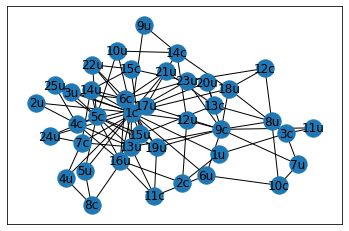

In [42]:
nx.draw_networkx(B)

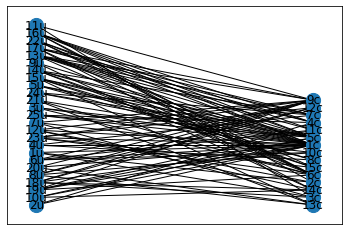

In [43]:
X, Y = bipartite.sets(B)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw_networkx(B, pos = pos, node_size=200)
plt.show()

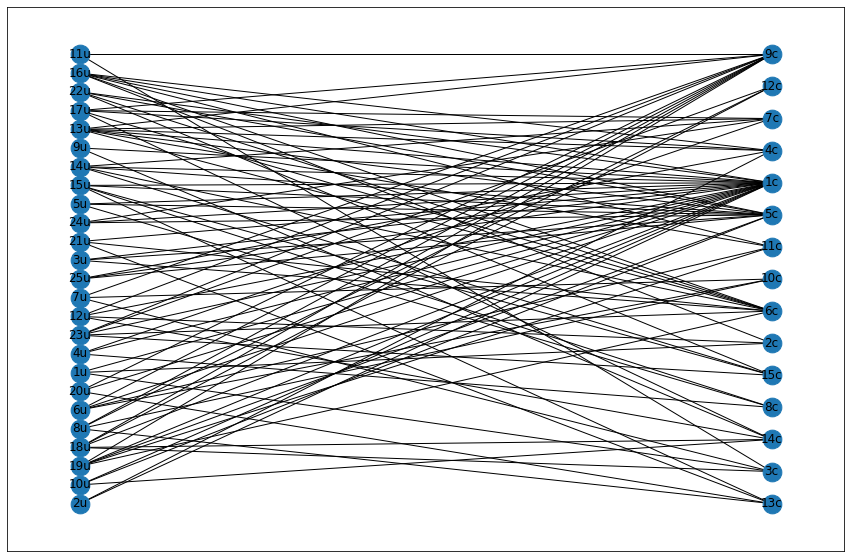

In [49]:

fig, ax = plt.subplots()
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B,users_uni ),node_size=350)
fig.set_size_inches(15, 10)
plt.show()

In [58]:
nx.is_bipartite(B)

True

In [70]:
bipartite.centrality.degree_centrality(B, users_uni)

{'2u': 0.13333333333333333,
 '10u': 0.2,
 '19u': 0.3333333333333333,
 '18u': 0.3333333333333333,
 '8u': 0.26666666666666666,
 '6u': 0.26666666666666666,
 '20u': 0.2,
 '1u': 0.2,
 '4u': 0.2,
 '23u': 0.3333333333333333,
 '12u': 0.26666666666666666,
 '7u': 0.2,
 '25u': 0.2,
 '3u': 0.2,
 '21u': 0.2,
 '24u': 0.2,
 '5u': 0.2,
 '15u': 0.3333333333333333,
 '14u': 0.3333333333333333,
 '9u': 0.13333333333333333,
 '13u': 0.4666666666666667,
 '17u': 0.3333333333333333,
 '22u': 0.26666666666666666,
 '16u': 0.4,
 '11u': 0.13333333333333333,
 '13c': 0.16,
 '3c': 0.16,
 '14c': 0.2,
 '8c': 0.12,
 '15c': 0.16,
 '2c': 0.12,
 '6c': 0.36,
 '10c': 0.12,
 '11c': 0.16,
 '5c': 0.44,
 '1c': 0.84,
 '4c': 0.2,
 '7c': 0.2,
 '12c': 0.12,
 '9c': 0.44}

In [63]:
bipartite.clustering(B)

{'1u': 0.2084054834054834,
 '2u': 0.24852607709750568,
 '3u': 0.36972789115646265,
 '4u': 0.22919501133786857,
 '5u': 0.3210714285714287,
 '6u': 0.23392857142857146,
 '7u': 0.2642135642135642,
 '8u': 0.22410714285714287,
 '9u': 0.25719954648526083,
 '10u': 0.32562358276644005,
 '11u': 0.2537878787878788,
 '12u': 0.2485449735449736,
 '13u': 0.30993716931216925,
 '14u': 0.33607331821617537,
 '15u': 0.2736394557823129,
 '16u': 0.3057823129251701,
 '17u': 0.1917044595616024,
 '18u': 0.241848544973545,
 '19u': 0.3263392857142858,
 '20u': 0.258779761904762,
 '21u': 0.26158008658008663,
 '22u': 0.347108843537415,
 '23u': 0.2582671957671958,
 '24u': 0.32108843537414977,
 '25u': 0.32414965986394567,
 '1c': 0.19551961496060874,
 '2c': 0.12583250083250083,
 '3c': 0.1603260869565217,
 '4c': 0.20223179598179597,
 '5c': 0.21778221778221782,
 '6c': 0.2299760845215391,
 '7c': 0.17579334246000913,
 '8c': 0.15714285714285714,
 '9c': 0.19185660493352802,
 '10c': 0.16936758893280635,
 '11c': 0.21681547619

In [71]:
bipartite.closeness_centrality(B, users_uni)

{'2u': 0.6631578947368421,
 '10u': 0.6774193548387096,
 '19u': 0.7590361445783133,
 '18u': 0.7590361445783133,
 '8u': 0.5779816513761468,
 '6u': 0.7411764705882353,
 '20u': 0.7241379310344828,
 '1u': 0.6923076923076923,
 '4u': 0.6774193548387096,
 '23u': 0.7590361445783133,
 '12u': 0.7411764705882353,
 '7u': 0.5478260869565217,
 '25u': 0.6774193548387096,
 '3u': 0.6774193548387096,
 '21u': 0.6923076923076923,
 '24u': 0.6774193548387096,
 '5u': 0.6631578947368421,
 '15u': 0.7078651685393258,
 '14u': 0.7078651685393258,
 '9u': 0.6631578947368421,
 '13u': 0.7974683544303798,
 '17u': 0.7078651685393258,
 '22u': 0.6923076923076923,
 '16u': 0.7241379310344828,
 '11u': 0.5384615384615384,
 '13c': 0.4953271028037383,
 '3c': 0.4774774774774775,
 '14c': 0.5145631067961165,
 '8c': 0.44537815126050423,
 '15c': 0.4953271028037383,
 '2c': 0.48623853211009177,
 '6c': 0.5824175824175825,
 '10c': 0.4690265486725664,
 '11c': 0.4953271028037383,
 '5c': 0.6091954022988506,
 '1c': 0.8688524590163934,
 '4c'